# Objectives




* To introduce you to 3 of the main (Python-based) libraries we'll be using throughout the module:
> 1. scikit-learn (https://scikit-learn.org/stable/) - one of the well-used machine learning libraries.
> 2. numpy (https://numpy.org/) -  a very common library for mathematical tasks.
> 3. matplotlib (https://matplotlib.org/) - for creating plots.
>**Note**: It is your responsibility as a machine learning scientist to read documentations for any library function you use and to thoroughly understand what it is doing, if it validly serves your purpose, and which of its parameters you need to consider.

* To explore the basic linear model and L1 and L2 regularization from Week 1 lecture

* To see some of the basic components of machine learning first hand - training data, training labels, test data, test labels, machine learning model (with weights and biases being the primary parameters that specify a model for most machine learning algorithms), model evaluation & performance - and some of the basic steps of the machine learning pipeline:
>1. Data sourcing - today, we'll simply generate data using a random number generator.
>2. Model building using training data & based on chosen machine learning algorithm(s) - linear regression (the basic linear model) is the very simplest algorithm.
>3. Model evaluation - our performance metric today is the mean squared error (same formula as the L2 loss).
>**Note** - A measure of model performance is referred to as 'loss' when the goal is to optimize the model parameters, but as '(performance) metric' when the goal is simply to analyze how well the model performs (especially on unseen data).

* To highlight to you the important principle of reproducibility


# Section 1 - Set up imports and random number generator

In [1]:
%matplotlib inline

import numpy
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Set up the random number generator
rng =  numpy.random.default_rng()

# Section 2 - Train linear regression model 1

In [3]:
# Generate random data between 0 and 1
# with number of data instances (n) = 10
# number of features (d) = 1
# number of labels = 1
training_data_x = rng.random((10, 1))
training_labels_y = rng.random((10, 1))

print('A randomly generated n x d input data where n=10 and d=1:')
print(training_data_x)
# print(training_labels_y)

# Train a linear regression model
lr_model_1 = linear_model.LinearRegression()
lr_model_1.fit(training_data_x, training_labels_y)
print("\nThe weight (w):",  lr_model_1.coef_)
print("The bias (b):",  lr_model_1.intercept_)

# Check the performance of the model on the data used to train it
training_pred_y = lr_model_1.predict(training_data_x)
print("\nMean squared error (error on training data): %.2f " % mean_squared_error(training_labels_y, training_pred_y))




A randomly generated n x d input data where n=10 and d=1:
[[0.92247666]
 [0.48171184]
 [0.55984653]
 [0.00707176]
 [0.10502413]
 [0.10089714]
 [0.93507319]
 [0.05043909]
 [0.10254839]
 [0.90183162]]
[[0.23326892]
 [0.59594555]
 [0.02596625]
 [0.7271047 ]
 [0.02736981]
 [0.96144887]
 [0.03401372]
 [0.10588996]
 [0.67874388]
 [0.84784277]]

The weight (w): [[-0.1972291]]
The bias (b): [0.50594323]

Mean squared error (error on training data): 0.12 


# Section 3 - Plot linear regression model 1

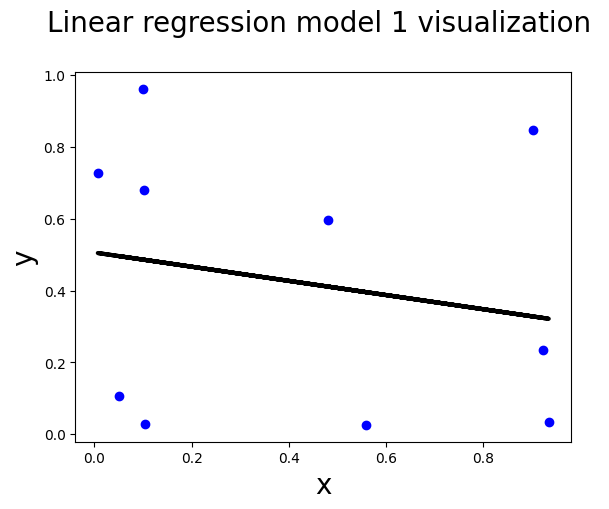

In [4]:
# Plot data and model
plt.scatter(training_data_x, training_labels_y, color="blue")
plt.plot(training_data_x, training_pred_y, color="black", linewidth=3)

plt.xlabel('x', size=20)
plt.ylabel('y', size=20)
plt.title('Linear regression model 1 visualization \n', size=20)

plt.show()

# Section 4 - Train linear regression model 2

In [7]:
# Generate random data between 0 and 1
# with number of data instances (n) = 100
# number of features (d) = 20
# number of labels = 1
training_data_x = rng.random((100, 20))
training_labels_y = rng.random((100, 1))

# print(training_data_x)

# Train a linear regression model
lr_model_2 = linear_model.LinearRegression()
lr_model_2.fit(training_data_x, training_labels_y)
print("\nThe weights (w):",  lr_model_2.coef_)
print("\nThe bias (b):",  lr_model_2.intercept_)

# Check the performance of the model on the data used to train it
training_pred_y = lr_model_2.predict(training_data_x)
print("\nMean squared error (training error): %.2f " % mean_squared_error(training_labels_y, training_pred_y))




The weights (w): [[-0.00122832  0.07007297 -0.01564257  0.09075529 -0.16173757  0.10669253
   0.05061243  0.10582587 -0.0098833  -0.16072173 -0.02004856 -0.05076565
  -0.13377984 -0.08358436  0.16541779 -0.01343802  0.16597236 -0.03853777
   0.12348314  0.03214669]]

The bias (b): [0.39087867]

Mean squared error (training error): 0.07 


## Reflections



*   Why are the 20 weights for model 2, but only one for model 1?
*   Why is there one bias for both models?



# Section 5 - Evaluate linear regression model 2

*   Generate a new data instance to evaluate model 2
*   What is the mean squared error obtained for this instance?



In [16]:
data_instance = rng.random((1, 20))
instance_pred = lr_model_2.predict(data_instance)

print(data_instance)

print(instance_pred)

y_instance = rng.random((1, 1))

print(y_instance)

mean_squared_error(y_instance, instance_pred)

[[0.85129037 0.79580324 0.55332632 0.22914677 0.73671007 0.9859077
  0.78924913 0.58232295 0.74281457 0.90878717 0.00780626 0.36091124
  0.93118794 0.4717577  0.06865369 0.79901641 0.86359312 0.59282723
  0.69763818 0.6156567 ]]
[[0.43650022]]
[[0.63165096]]


0.0380838134753329

# Section 6 - Explore the effects of L1 and L2 regularization

*   Generate new training and test data
*   Train and evaluate a linear regression model
  * See above examples; also see https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
*   Train and evaluate a linear regression model with L2 regularization
  * Set alpha to 0.5
  * See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)
*   Train and evaluate a linear regression model with L1 regularization
  * Set alpha to 0.5
  * See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)
*   What are the effects of regularization that you notice?
  * See Week 1 lecture
  * Hint - Compare the weights (and bias) and the errors.




# Section 7 - Explore reproducibility


* Run Section 2 code multiple times (e.g. 3 times) - each time, copy and paste your outputs (training data, weight, bias, mean squared error) somewhere so that you can compare outputs across the multiple runs. What do you notice? What is the implication, and how could you address it?

# Section 8 - Explore the effect of alpha on L1 and L2 regularization

* Using your code in Section 6, compare the effect of multiple alpha values, e.g. alpha = 0.000000001, 0.0001, 0.1, on regularization.